<a href="https://colab.research.google.com/github/Lupoyo/projectNew/blob/main/NLP_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import chardet

In [ ]:
from IPython.display import display

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/yelp.csv')

In [ ]:
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [ ]:
data.isnull().sum()

,0
business_id,0
date,0
review_id,0
stars,0
text,0
type,0
user_id,0
cool,0
useful,0
funny,0


In [ ]:
data.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [ ]:
data.describe()


,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


EDA

In [ ]:
data['text lenghth'] = data['text'].apply(len)

In [ ]:
sns.set_style('white')

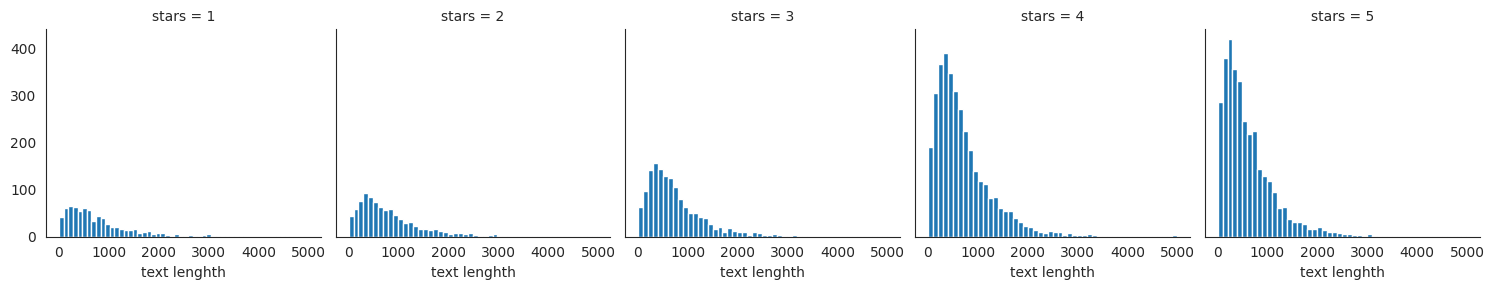

In [ ]:
g = sns.FacetGrid(data, col='stars')
g.map(plt.hist,'text lenghth',bins=50)
g.add_legend()
plt.show()

<ipython-input-38-42a16da5b338>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stars', y='text lenghth',data=data,palette='rainbow')


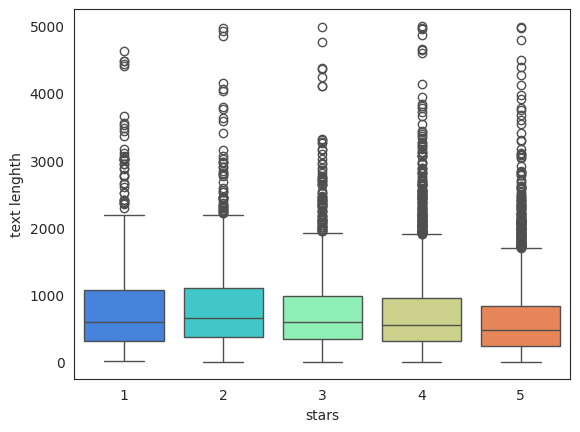

In [ ]:
sns.boxplot(x='stars', y='text lenghth',data=data,palette='rainbow')
plt.show()

<ipython-input-57-539245cd5700>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stars',data=data,palette='rainbow')


<Axes: xlabel='stars', ylabel='count'>

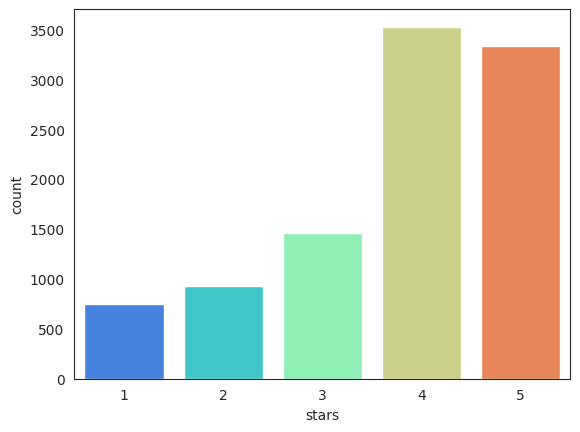

In [ ]:
sns.countplot(x='stars',data=data,palette='rainbow')

In [ ]:
ab=data.groupby('stars').mean()


TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
print(data.dtypes)

business_id     object
date            object
review_id       object
stars            int64
text            object
type            object
user_id         object
cool             int64
useful           int64
funny            int64
text lenghth     int64
dtype: object


In [ ]:
data['text lenghth'] = pd.to_numeric(data['text lenghth'], errors='coerce')

In [ ]:
ab = data.groupby('stars').mean(numeric_only=True).reset_index()
ab


,stars,cool,useful,funny,text lenghth
0,1,0.576769,1.604806,1.056075,826.515354
1,2,0.719525,1.563107,0.875944,842.256742
2,3,0.788501,1.306639,0.694730,758.498289
3,4,0.954623,1.395916,0.670448,712.923142
4,5,0.944261,1.381780,0.608631,624.999101


In [ ]:
ab.corr()

,stars,cool,useful,funny,text lenghth
stars,1.000000,0.964758,-0.761288,-0.950389,-0.950171
cool,0.964758,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.761288,-0.743329,1.000000,0.894506,0.699881
funny,-0.950389,-0.944939,0.894506,1.000000,0.843461
text lenghth,-0.950171,-0.857664,0.699881,0.843461,1.000000


<Axes: >

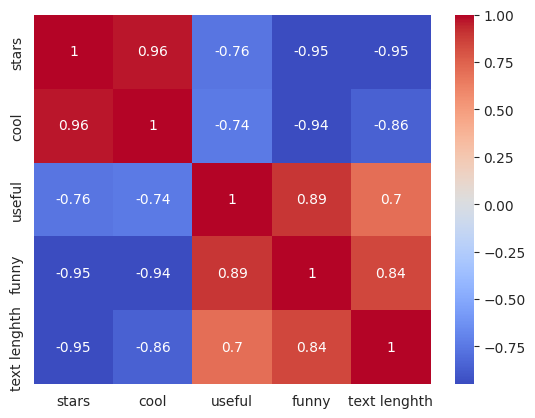

In [ ]:
sns.heatmap(ab.corr(),cmap='coolwarm', annot=True)

In [ ]:
data_class = [(data['stars']==1) | (data['stars']==5)]
data_class

[0        True
 1        True
 2       False
 3        True
 4        True
         ...  
 9995    False
 9996    False
 9997    False
 9998    False
 9999     True
 Name: stars, Length: 10000, dtype: bool]

In [ ]:
data_class_df = pd.DataFrame(data_class)




In [ ]:
print(data_class_df.head())
print(data_class_df.columns)

       0     1      2     3     4      5     6      7      8     9     ...  \
stars  True  True  False  True  True  False  True  False  False  True  ...   

       9990  9991  9992   9993  9994   9995   9996   9997   9998  9999  
stars  True  True  True  False  True  False  False  False  False  True  

[1 rows x 10000 columns]
RangeIndex(start=0, stop=10000, step=1)


In [ ]:
print(data_class[:5])

[0        True
1        True
2       False
3        True
4        True
        ...  
9995    False
9996    False
9997    False
9998    False
9999     True
Name: stars, Length: 10000, dtype: bool]


In [ ]:
data_class_df = pd.DataFrame(data_class)

In [ ]:
print(data_class_df.head())
print(data_class_df.columns)

       0     1      2     3     4      5     6      7      8     9     ...  \
stars  True  True  False  True  True  False  True  False  False  True  ...   

       9990  9991  9992   9993  9994   9995   9996   9997   9998  9999  
stars  True  True  True  False  True  False  False  False  False  True  

[1 rows x 10000 columns]
RangeIndex(start=0, stop=10000, step=1)


In [ ]:


# Example: If you want to set the first two columns as 'message' and 'ratings'
data_class_df.columns = ['text', 'stars'] + list(data_class_df.columns[2:])

# Check the updated DataFrame
print(data_class_df.head())
print(data_class_df.columns)


       text  stars      2     3     4      5     6      7      8     9  ...  \
stars  True   True  False  True  True  False  True  False  False  True  ...   

       9990  9991  9992   9993  9994   9995   9996   9997   9998  9999  
stars  True  True  True  False  True  False  False  False  False  True  

[1 rows x 10000 columns]
Index([ 'text', 'stars',       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
          9990,    9991,    9992,    9993,    9994,    9995,    9996,    9997,
          9998,    9999],
      dtype='object', length=10000)


In [ ]:
X = data_class_df['text']  # Change 'text' if necessary
y = data_class_df['stars']  # Change 'stars' if necessary

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
data_class_df['text'] = data_class_df['text'].astype(str)

In [ ]:
X = data_class_df['text']


In [ ]:
cv = CountVectorizer()

In [ ]:
X = cv.fit_transform(X)

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target

# Step 3: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [ ]:
nb.fit(X_train,y_train)

MultinomialNB()

In [ ]:
predictions = nb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test,predictions))

[[13  0  0]
 [ 0  0 20]
 [ 0  0 12]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.00      0.00      0.00        20
           2       0.38      1.00      0.55        12

    accuracy                           0.56        45
   macro avg       0.46      0.67      0.52        45
weighted avg       0.39      0.56      0.43        45



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline([
    ('bow', CountVectorizer()),  # Convert text to bag-of-words
    ('Tfidf', TfidfTransformer()),  # Apply TF-IDF transformation
    ('model', MultinomialNB())  # Multinomial Naive Bayes model
])


In [ ]:
X = data_class_df['text']  # Change 'text' if necessary
y = data_class_df['stars']  # Change 'stars' if necessary
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target

# Step 3: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)

In [ ]:
pipe = Pipeline([
    ('model', MultinomialNB())  # Multinomial Naive Bayes model
])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('model', MultinomialNB())])

In [ ]:
predictions = pipe.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test,predictions))

[[13  0  0]
 [ 0  0 20]
 [ 0  0 12]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.00      0.00      0.00        20
           2       0.38      1.00      0.55        12

    accuracy                           0.56        45
   macro avg       0.46      0.67      0.52        45
weighted avg       0.39      0.56      0.43        45



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
